# Purpose - Analyze what kind of person will accept Coffee House coupon 

#### Import all required libraries

In [42]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data from file and filter out Coffee House Coupon data

In [43]:
data = pd.read_csv('data/coupons.csv')
chc_data = data[data['coupon'] == 'Coffee House']

### Understand data 

In [44]:
chc_data.info()
chc_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   37 non-null     object
 15  Bar                   3959 non-null   obje

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


### Show data stats

In [45]:
chc_data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,3996.000000,3996.000000,3996.0,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,68.031782,0.387888,1.0,0.518769,0.077578,0.187688,0.812312,0.499249
std,15.984543,0.487330,0.0,0.499710,0.267539,0.390511,0.390511,0.500062
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000



Coffee Coupon Accept Rate is: 49.92% 
Total number is: 3996 
Accept Number is: 1995


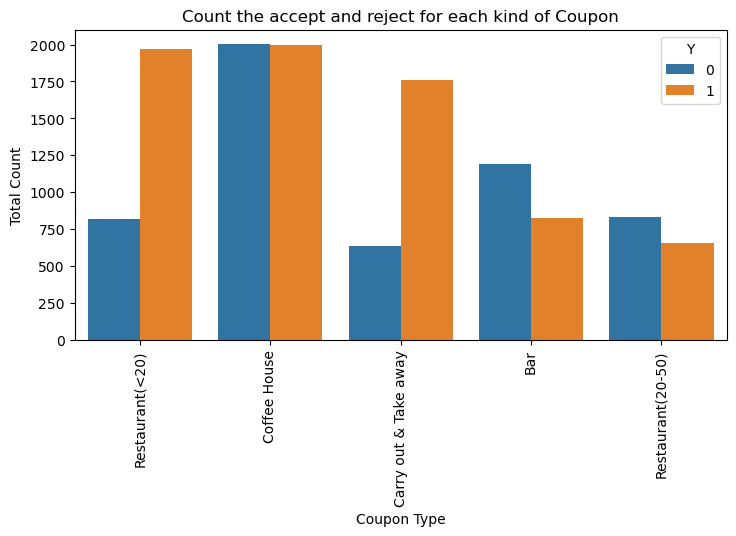

Hypothesis #1: For Coffee House Coupon, there are almost same chance of accept and reject 


In [46]:
accept_num = chc_data[chc_data['Y'] == 1].shape[0]
total_num = chc_data.shape[0]
accept_rate = (accept_num / total_num)
print("\nCoffee Coupon Accept Rate is: {:.2%}".format(accept_rate), 
      "\nTotal number is:", total_num, 
      "\nAccept Number is:", accept_num, )
plt.figure(figsize=(8, 6))
sns.countplot(x='coupon', hue='Y', data=data)
plt.title('Count the accept and reject for each kind of Coupon')
plt.xlabel('Coupon Type')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByCouponType.png')
plt.show()

print("Hypothesis #1: For Coffee House Coupon, there are almost same chance of accept and reject ")

#### Analysis 2 :Plot the gender vs accept coffee house coupon

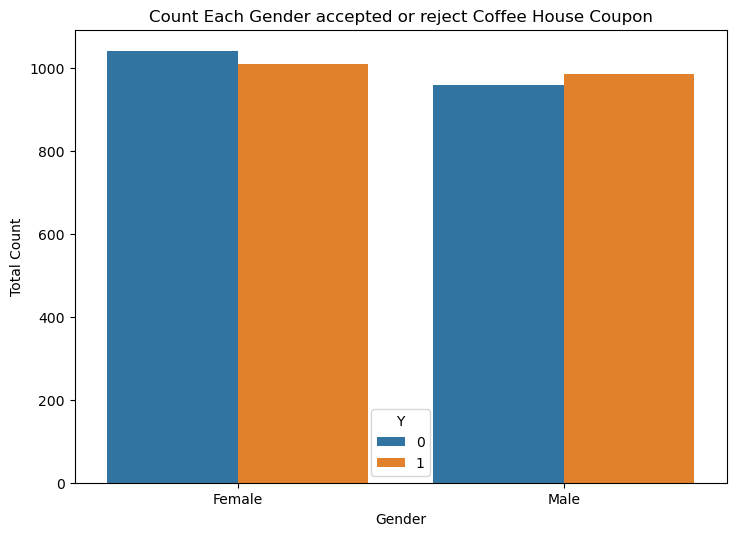

Hypothesis #2: Man is more likely to accept the coffee house coupon than reject it. 


In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Y', data=chc_data)
plt.title('Count Each Gender accepted or reject Coffee House Coupon')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByGender.png')
plt.show()
print("Hypothesis #2: Man is more likely to accept the coffee house coupon than reject it. ")

#### Analysis #3: Does high or low income have impact on the acceptance rate? 

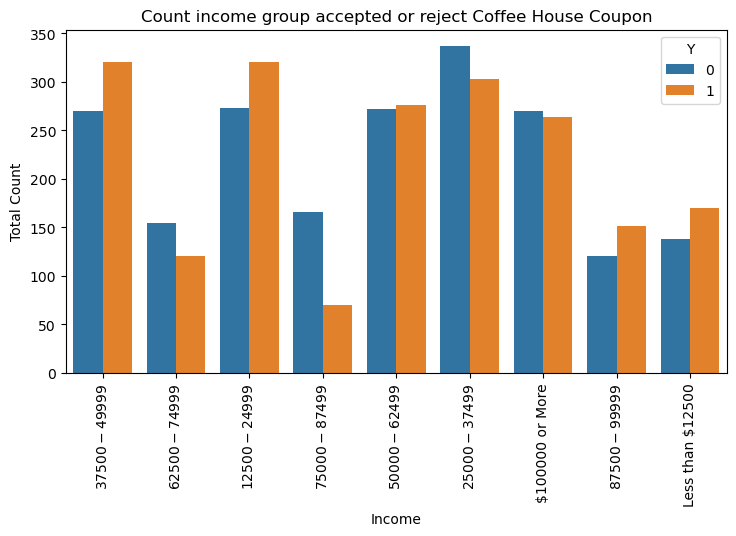

Hypothesis #3: No consistent relationship between income and the chance of people accetp the coffee house coupon 


In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='income', hue='Y', data=chc_data)
plt.title('Count income group accepted or reject Coffee House Coupon')
plt.xlabel('Income')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByIncome.png')
plt.show()
print("Hypothesis #3: No consistent relationship between income and the chance of people accetp the coffee house coupon ")

#### Analysis #4: Impact of destinamtion 

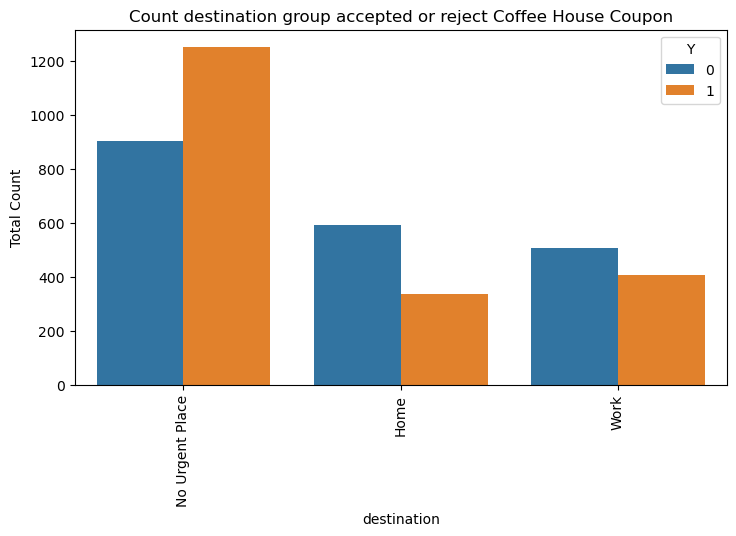

Hypothesis #4: When people has no urgent to go to work or back to home, they will be more likely to accept the coupon


In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='destination', hue='Y', data=chc_data)
plt.title('Count destination group accepted or reject Coffee House Coupon')
plt.xlabel('destination')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByDestination.png')
plt.show()
print ("Hypothesis #4: When people has no urgent to go to work or back to home, they will be more likely to accept the coupon")

### Analysis #5: Impact of education 

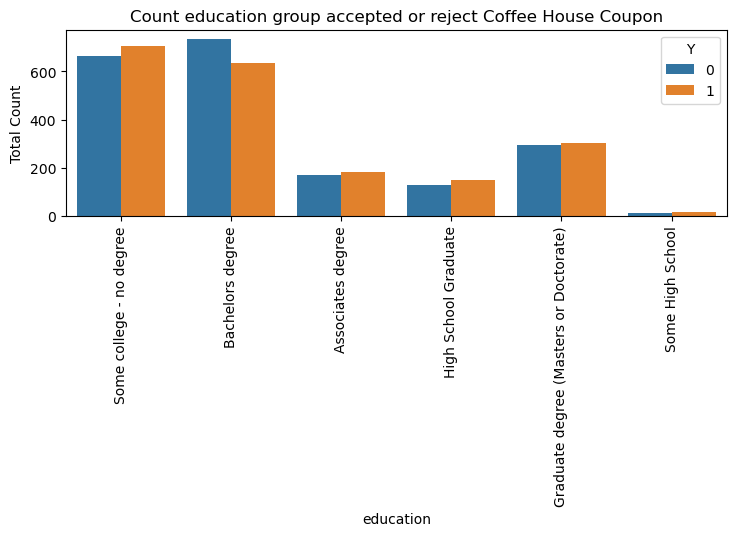

Hypothesis #5:There is no clear coorelation between education and accptance rate of the coffee house coupon


In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='Y', data=chc_data)
plt.title('Count education group accepted or reject Coffee House Coupon')
plt.xlabel('education')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByEducation.png')
plt.show()
print ("Hypothesis #5:There is no clear coorelation between education and accptance rate of the coffee house coupon")

### Analyis #6: The impact of the frequency of people go to coffee house

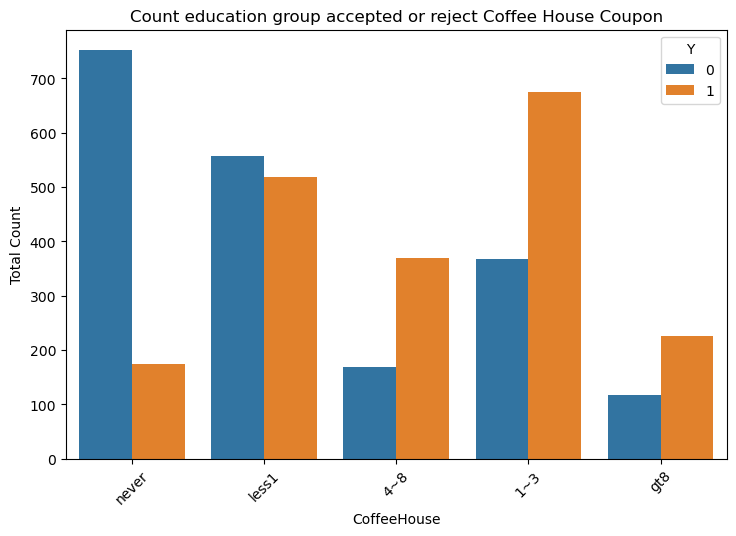

Hypothesis #6: People go to coffee house 1 or more per month has much higher chance to accept the coffee house coupon 


In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CoffeeHouse', hue='Y', data=chc_data)
plt.title('Count education group accepted or reject Coffee House Coupon')
plt.xlabel('CoffeeHouse')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByFrequency.png')
plt.show()
print ("Hypothesis #6: People go to coffee house 1 or more per month has much higher chance to accept the coffee house coupon ")

### Analysis #7: Weather impact 

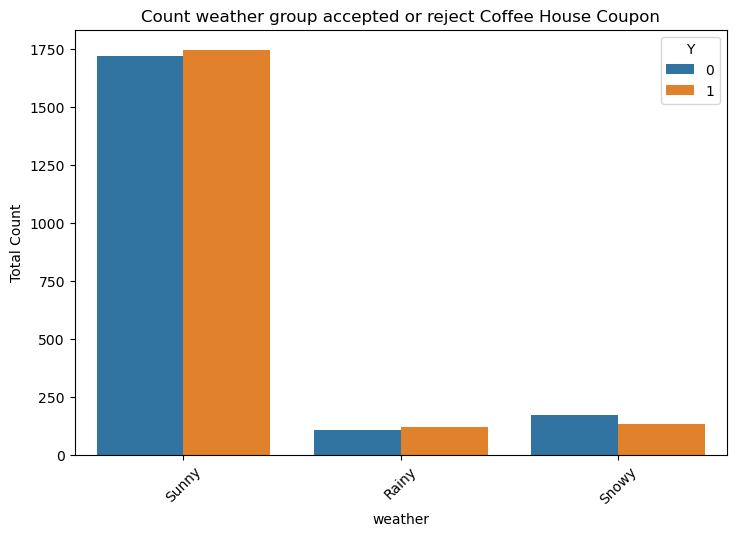

Hypothesis #7: Weather has no significant impact on if people will accept the coffee house coupon 


In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='weather', hue='Y', data=chc_data)
plt.title('Count weather group accepted or reject Coffee House Coupon')
plt.xlabel('weather')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByWeather.png')
plt.show()
print ("Hypothesis #7: Weather has no significant impact on if people will accept the coffee house coupon ")

### Analysis #8: Temp Impact

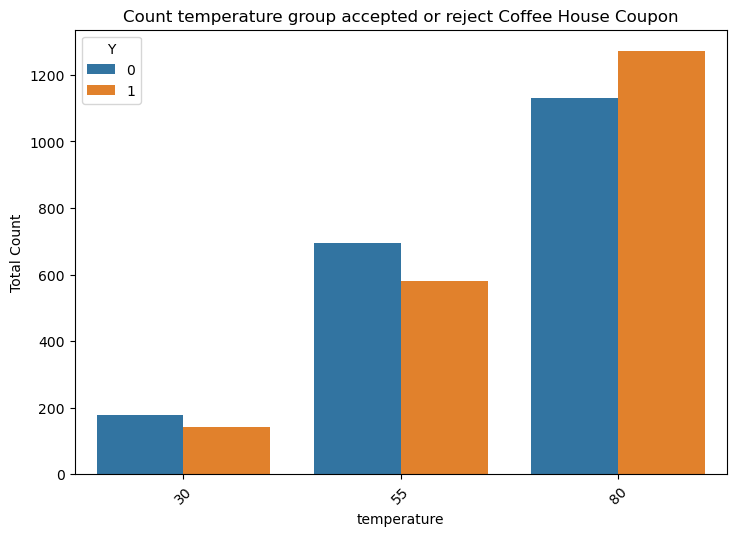

Hypothesis #8: When tempature is in 80 people will more likely accept the coffee house coupon 


In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='temperature', hue='Y', data=chc_data)
plt.title('Count temperature group accepted or reject Coffee House Coupon')
plt.xlabel('temperature')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByTemp.png')
plt.show()
print ("Hypothesis #8: When tempature is in 80 people will more likely accept the coffee house coupon ")

###  Analysis #9:Time impact 

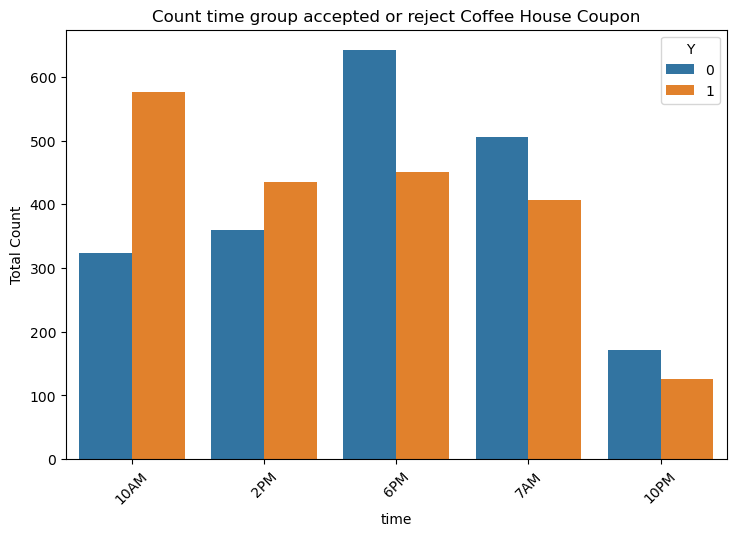

Hypothesis #9: 10 AM to 2PM is the best time to provide coffee house coupon, people are more likely to accept


In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='time', hue='Y', data=chc_data)
plt.title('Count time group accepted or reject Coffee House Coupon')
plt.xlabel('time')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByTime.png')
plt.show()
print ("Hypothesis #9: 10 AM to 2PM is the best time to provide coffee house coupon, people are more likely to accept")

###  Analysis #10: Expiration Impact 

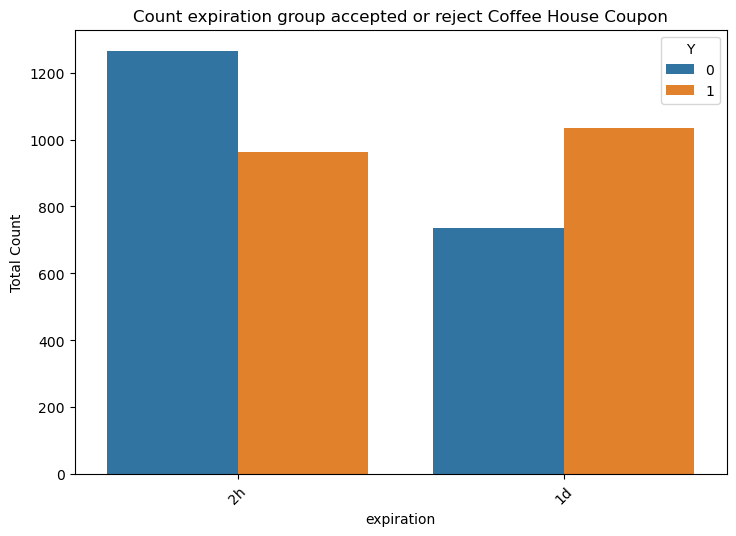

Hypothesis #10: expiration of 1 day coffee house coupon, people are more likely to accept


In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='expiration', hue='Y', data=chc_data)
plt.title('Count expiration group accepted or reject Coffee House Coupon')
plt.xlabel('expiration')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByExpiration.png')
plt.show()
print ("Hypothesis #10: expiration of 1 day coffee house coupon, people are more likely to accept")

###  Analysis #11: Age Impact 

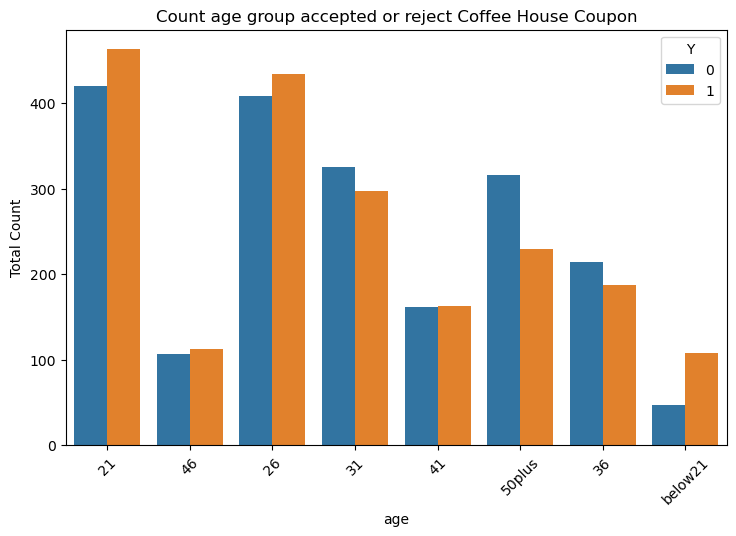

Hypothesis #11: Below 26, people are more likely to accept, 50plus people are more likely to reject 


In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age', hue='Y', data=chc_data)
plt.title('Count age group accepted or reject Coffee House Coupon')
plt.xlabel('age')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByAge.png')
plt.show()
print ("Hypothesis #11: Below 26, people are more likely to accept, 50plus people are more likely to reject ")

###  Analysis #12: Occupation 

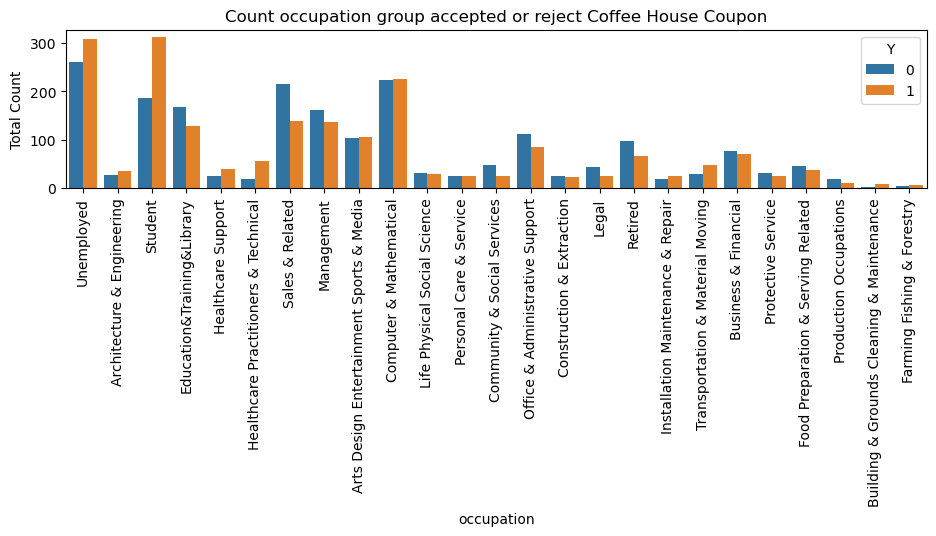

Hypothesis #12: Unemployed, student, healthcare professional are more likely to accept the coffee house coupon. Sales and retired are more likely to reject the coupon 


In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='Y', data=chc_data)
plt.title('Count occupation group accepted or reject Coffee House Coupon')
plt.xlabel('occupation')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByOccupation.png')
plt.show()
print ("Hypothesis #12: Unemployed, student, healthcare professional are more likely to accept the coffee house coupon. Sales and retired are more likely to reject the coupon ")

###  Analysis #13: Marial status Impact 

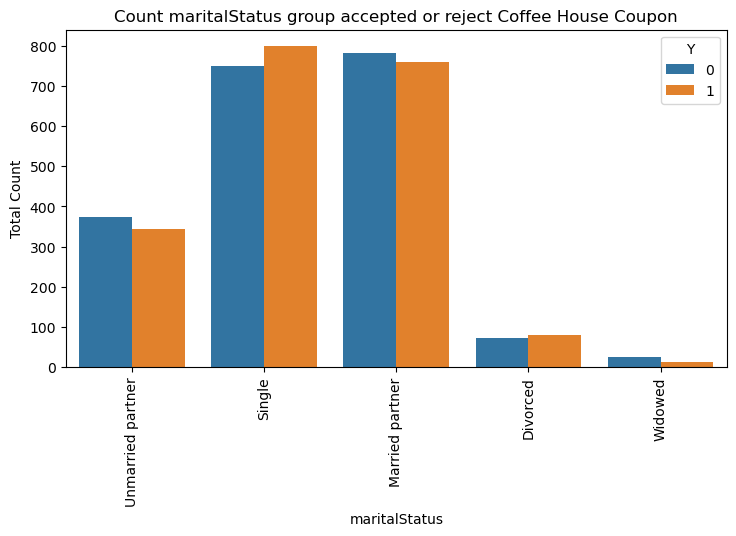

Hypothesis #13: Compare with other married status, single is more likely to accept the coffee house coupon.


In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(x='maritalStatus', hue='Y', data=chc_data)
plt.title('Count maritalStatus group accepted or reject Coffee House Coupon')
plt.xlabel('maritalStatus')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByMaritalStatus.png')
plt.show()
print ("Hypothesis #13: Compare with other married status, single is more likely to accept the coffee house coupon.")

###  Analysis #14: Has children impact 

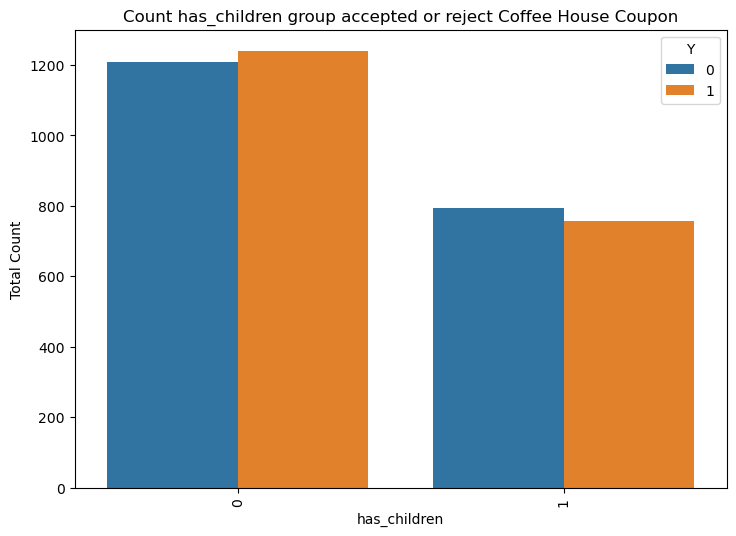

Hypothesis #14: Those with childer is slightly likely to reject the coffee house coupon.


In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='has_children', hue='Y', data=chc_data)
plt.title('Count has_children group accepted or reject Coffee House Coupon')
plt.xlabel('has_children')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByChildren.png')
plt.show()
print ("Hypothesis #14: Those with childer is slightly likely to reject the coffee house coupon.")

###  Analysis #14: Impact of passanger

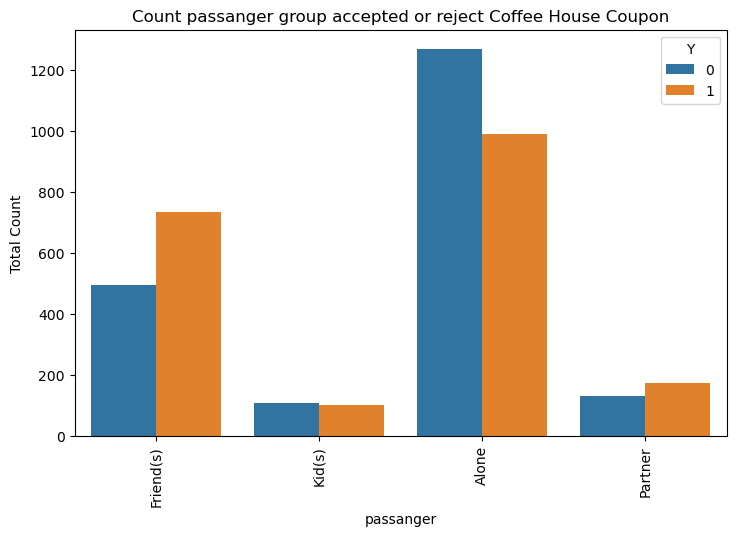

Hypothesis #15: When driving with friend or partener, they are more likely to accept  the coffee house coupon. When driveing along is more likely to reject the coupon


In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(x='passanger', hue='Y', data=chc_data)
plt.title('Count passanger group accepted or reject Coffee House Coupon')
plt.xlabel('passanger')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByPassanger.png')
plt.show()
print ("Hypothesis #15: When driving with friend or partener, they are more likely to accept  the coffee house coupon. When driveing along is more likely to reject the coupon")

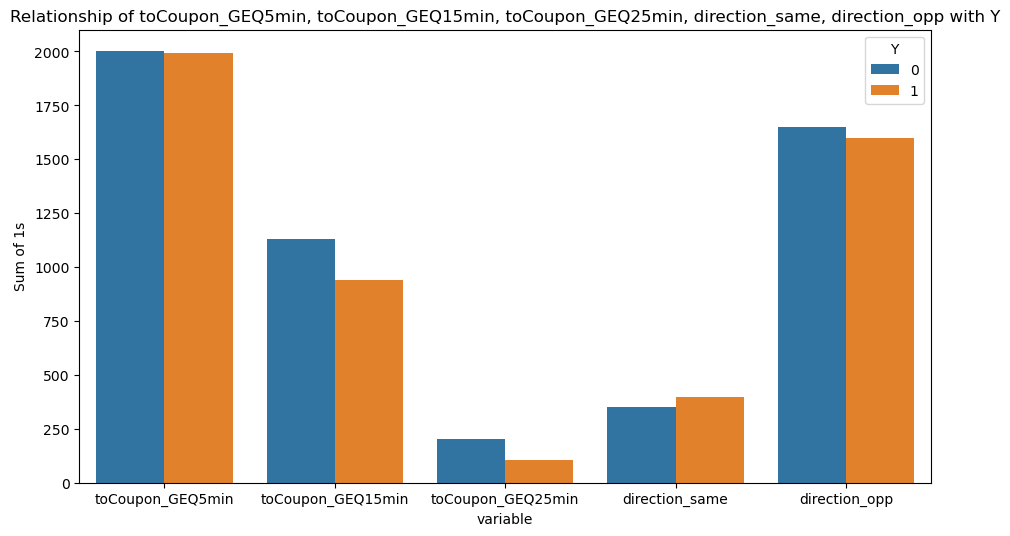

Hypothesis #16: When distance is longer than 25 minutes, people are more likely to reject. The direction does not have impact on the outcome


In [61]:
chc_data_dir = chc_data[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 
                       'direction_same', 'direction_opp',  'Y']]

grouped = chc_data_dir.groupby('Y').sum()

# Melting the DataFrame to make it suitable for sns.barplot
melted_df = chc_data_dir.melt(id_vars='Y', var_name='variable', value_name='value')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='value', hue='Y', data=melted_df, estimator=sum, errorbar=None)
plt.title('Relationship of toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp with Y')
plt.ylabel('Sum of 1s')
plt.tight_layout(pad=3.0)
plt.savefig('./images/RateByDistDirection.png')
plt.show()

print ("Hypothesis #16: When distance is longer than 25 minutes, people are more likely to reject. The direction does not have impact on the outcome")